# Real estate investments for holiday rentals

MINE-4101: Applied Data Science  
Univerisdad de los Andes

David Esteban Fajardo Torres   

Dataset: San Francisco, California, United States

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, shapiro, mannwhitneyu, chi2_contingency

In [2]:
air_bnb_df = pd.read_csv('./data/listings.csv')

In [3]:
air_bnb_df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

In [4]:
air_bnb_df.head(50)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,50489368,https://www.airbnb.com/rooms/50489368,20240904163718,2024-09-04,previous scrape,(B) Furnished Efficiency Studio near Union Square,"This special place is close to everything, mak...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,190158687,...,5.00,5.00,5.00,NaN,t,1,1,0,0,0.03
1,53687935,https://www.airbnb.com/rooms/53687935,20240904163718,2024-09-04,previous scrape,2 Private Rooms in SF. Walk to Bart. Modern Home,Enjoy a stylish and zen experience at this mod...,safe and quiet neighborhood,https://a0.muscache.com/pictures/347792c2-b0e2...,433577666,...,4.76,4.57,4.48,0005556,f,1,0,1,0,0.63
2,623833252305593889,https://www.airbnb.com/rooms/623833252305593889,20240904163718,2024-09-04,city scrape,Massive 1-bedroom condo in the heart of SF,Spacious 1-bed 1-bath condo in downtown SF nea...,NaN,https://a0.muscache.com/pictures/airflow/Hosti...,2180153,...,5.00,4.93,4.73,2022-002139STR,f,2,1,1,0,0.57
3,53817024,https://www.airbnb.com/rooms/53817024,20240904163718,2024-09-04,previous scrape,Large 1-bedroom in a condo in the heart of SF,Spacious private bedroom in a 1-bed 1-bath con...,Situated in Rincon Hill / East Cut neighborhoo...,https://a0.muscache.com/pictures/miso/Hosting-...,2180153,...,5.00,5.00,4.87,2022-002139STR,f,2,1,1,0,1.24
4,54381390,https://www.airbnb.com/rooms/54381390,20240904163718,2024-09-04,previous scrape,Cozy 1-bedroom condo with roof deck,1 bedroom condo in a new building located in t...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,2274937,...,5.00,5.00,4.89,STR-0005716,t,1,1,0,0,0.34
5,566641223679016306,https://www.airbnb.com/rooms/566641223679016306,20240904163718,2024-09-04,previous scrape,Charming Victorian Mission Home,Come and stay at my charming Victorian home in...,The condo is located in a peaceful and trendy ...,https://a0.muscache.com/pictures/miso/Hosting-...,93690401,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
6,51508029,https://www.airbnb.com/rooms/51508029,20240904163718,2024-09-04,city scrape,Orange Village Hostel -Full Size Bed w/shared ...,"Located in Central San Francisco, Orange Villa...",NaN,https://a0.muscache.com/pictures/8e77e63c-534e...,76841544,...,4.67,4.40,4.60,0475941,t,9,0,8,1,0.40
7,557318953734194464,https://www.airbnb.com/rooms/557318953734194464,20240904163718,2024-09-04,previous scrape,Orange Village Hostel- Twin Bed w/shared bath,Easily access local hot spots from this hip pl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,76841544,...,3.67,4.67,4.00,0475941,t,9,0,8,1,0.32
8,565272991337321502,https://www.airbnb.com/rooms/565272991337321502,20240904163718,2024-09-04,city scrape,Orange Village Hostel- 3 Bed Room w/shared bath,"Located in Central San Francisco, Orange Villa...",We are located at the intersection of Taylor S...,https://a0.muscache.com/pictures/miso/Hosting-...,76841544,...,4.85,4.40,4.93,0475941,t,9,0,8,1,1.42
9,50489340,https://www.airbnb.com/rooms/50489340,20240904163718,2024-09-04,city scrape,Orange Village Hostel - Full Size Bed w/Bathroom,"Located in Central San Francisco, Orange Villa...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,76841544,...,4.66,4.40,4.53,0475941,t,9,0,8,1,3.07


The most relevant attributes for analysis:

- Price
- Location
- Property type
- User rating
- Amenities


In [5]:
air_bnb_df['neighbourhood_cleansed'].isnull().sum()

np.int64(0)

In [6]:
air_bnb_df.groupby('property_type').size()

property_type
Casa particular                          2
Cycladic home                            1
Entire bungalow                          5
Entire condo                           868
Entire cottage                          14
Entire guest suite                     509
Entire guesthouse                       70
Entire home                            977
Entire in-law                            1
Entire loft                             59
Entire place                             5
Entire rental unit                    2153
Entire resort                            3
Entire serviced apartment              157
Entire townhouse                        62
Entire vacation home                    14
Entire villa                             7
Private room                            10
Private room in bed and breakfast       22
Private room in bungalow                 1
Private room in casa particular          4
Private room in condo                  179
Private room in cottage                 

In [7]:
air_bnb_df.groupby('property_type')['reviews_per_month'].count()

property_type
Casa particular                          2
Cycladic home                            1
Entire bungalow                          5
Entire condo                           691
Entire cottage                          13
Entire guest suite                     501
Entire guesthouse                       62
Entire home                            852
Entire in-law                            1
Entire loft                             51
Entire place                             4
Entire rental unit                    1563
Entire resort                            3
Entire serviced apartment              129
Entire townhouse                        54
Entire vacation home                    10
Entire villa                             6
Private room                             7
Private room in bed and breakfast       15
Private room in bungalow                 1
Private room in casa particular          4
Private room in condo                  157
Private room in cottage                 

In [8]:
air_bnb_df.groupby('property_type')['reviews_per_month'].apply(lambda x: x.isnull().sum())

property_type
Casa particular                         0
Cycladic home                           0
Entire bungalow                         0
Entire condo                          177
Entire cottage                          1
Entire guest suite                      8
Entire guesthouse                       8
Entire home                           125
Entire in-law                           0
Entire loft                             8
Entire place                            1
Entire rental unit                    590
Entire resort                           0
Entire serviced apartment              28
Entire townhouse                        8
Entire vacation home                    4
Entire villa                            1
Private room                            3
Private room in bed and breakfast       7
Private room in bungalow                0
Private room in casa particular         0
Private room in condo                  22
Private room in cottage                 1
Private room in gues

In [9]:
air_bnb_df.groupby('room_type').size()

room_type
Entire home/apt    4924
Hotel room           97
Private room       2718
Shared room          68
dtype: int64

In [10]:
air_bnb_df['price'].isnull().sum()

np.int64(1649)

In [11]:
air_bnb_df.groupby('property_type')['price'].count()

property_type
Casa particular                          2
Cycladic home                            0
Entire bungalow                          4
Entire condo                           678
Entire cottage                          12
Entire guest suite                     474
Entire guesthouse                       64
Entire home                            760
Entire in-law                            1
Entire loft                             49
Entire place                             5
Entire rental unit                    1796
Entire resort                            3
Entire serviced apartment               89
Entire townhouse                        49
Entire vacation home                     8
Entire villa                             6
Private room                             9
Private room in bed and breakfast       21
Private room in bungalow                 1
Private room in casa particular          2
Private room in condo                  140
Private room in cottage                 

In [12]:
duplicates = air_bnb_df.duplicated().sum()
print('Number of duplicate records', duplicates)

Number of duplicate records 0


In [13]:
air_bnb_df["price_float"] = air_bnb_df["price"].replace({r'\$': '', r',': ''}, regex=True).astype(float).dropna()
max_price = air_bnb_df["price_float"].max()
min_price = air_bnb_df["price_float"].min()
print('Max price:', max_price, 'Min price:', min_price)


Max price: 50000.0 Min price: 25.0


In [14]:
price_variance = air_bnb_df['price_float'].var(skipna=True)
print('Variance:', price_variance)

Variance: 1000157.4203688395


In [15]:
price_standard_deviation = air_bnb_df['price_float'].std()
print('Standard deviation:', price_standard_deviation)

Standard deviation: 1000.0787070870169


In [16]:
price_media = air_bnb_df['price_float'].mean()
print('Media:', price_media)  

Media: 239.66531341344592


In [17]:
price_median = air_bnb_df['price_float'].median()
print('Median:', price_median)  

Median: 150.0


<Axes: title={'center': 'Number of properties per neighbourhood'}, xlabel='Neighbourhood', ylabel='Count'>

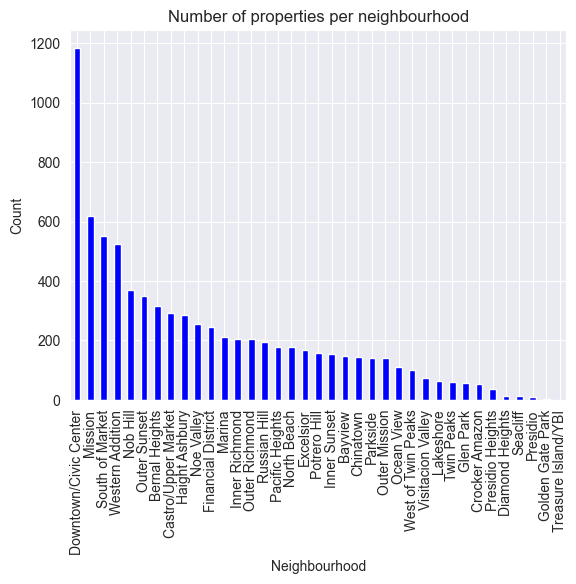

In [18]:
air_bnb_df['neighbourhood_cleansed'].value_counts().plot(kind='bar', color='blue', title='Number of properties per neighbourhood', xlabel='Neighbourhood', ylabel='Count')

<Axes: title={'center': 'Number of property types'}, xlabel='Property types', ylabel='Count'>

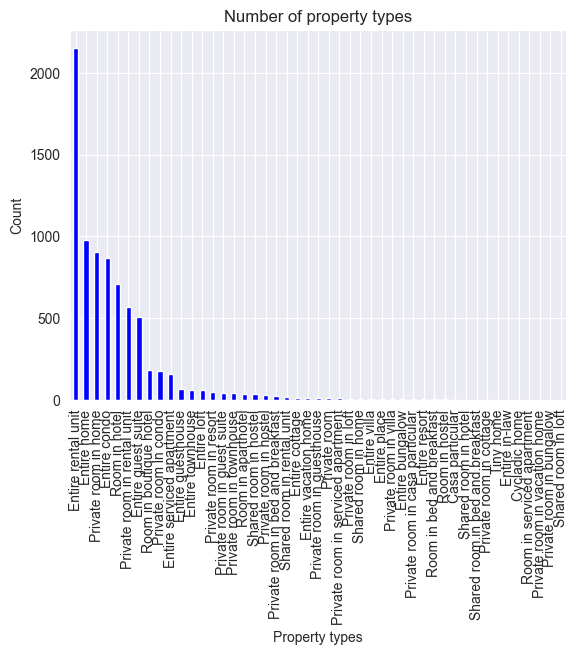

In [19]:
air_bnb_df['property_type'].value_counts(dropna=False, normalize=False).plot(kind='bar', color='blue', title='Number of property types', xlabel='Property types', ylabel='Count')

In [20]:
rating_variance = air_bnb_df['review_scores_rating'].var(skipna=True)
print(rating_variance)

0.16018621422253557


In [21]:
rating_standard_deviation = air_bnb_df['review_scores_rating'].std(skipna=True)
print(rating_standard_deviation)

0.40023270009150375


In [22]:
rating_mean = air_bnb_df['review_scores_rating'].mean(skipna=True)
print(rating_mean)

4.787390656063618


In [23]:
rating_median = air_bnb_df['review_scores_rating'].median()
print('Median:', rating_median)

Median: 4.91


In [24]:
import ast

amenities_unique = set()
for item in air_bnb_df['amenities']:
    item.replace(':', '')
    new_item = ast.literal_eval(item)
    for value in new_item:
        amenities_unique.add(value)
amenities_unique_df = pd.DataFrame()
amenities_unique_df['amenities_cleaned'] = pd.DataFrame(amenities_unique)
amenities_unique_df.head(50)

,amenities_cleaned
0,Shea Moisture shampoo
1,AVEDA Shampure conditioner
2,"HDTV with Netflix, standard cable"
3,Samsung stainless steel electric stove
4,42 inch HDTV with Netflix
5,"56 inch HDTV with Chromecast, Roku, Amazon Pri..."
6,"42 inch HDTV with Amazon Prime Video, Apple TV..."
7,Housekeeping available from 9:00 AM to 3:00 PM...
8,"34 inch HDTV with Amazon Prime Video, HBO Max,..."
9,46 inch TV with Chromecast


In [25]:
neighborhood_frec_cumsum = air_bnb_df['neighbourhood_cleansed'].value_counts(dropna=False, normalize=True).cumsum()
neighborhood_frec_cumsum

neighbourhood_cleansed
Downtown/Civic Center    0.151787
Mission                  0.231075
South of Market          0.301652
Western Addition         0.368772
Nob Hill                 0.416165
Outer Sunset             0.460740
Bernal Heights           0.501345
Castro/Upper Market      0.539003
Haight Ashbury           0.575765
Noe Valley               0.608300
Financial District       0.639554
Marina                   0.666709
Inner Richmond           0.693096
Outer Richmond           0.719226
Russian Hill             0.744204
Pacific Heights          0.767132
North Beach              0.789804
Excelsior                0.811195
Potrero Hill             0.831433
Inner Sunset             0.851031
Bayview                  0.869732
Chinatown                0.888177
Parkside                 0.906366
Outer Mission            0.924427
Ocean View               0.938389
West of Twin Peaks       0.951198
Visitacion Valley        0.960548
Lakeshore                0.968618
Twin Peaks               

In [26]:
most_representative_neighborhoods = neighborhood_frec_cumsum.loc[neighborhood_frec_cumsum < 0.9].index.tolist()
most_representative_neighborhoods

['Downtown/Civic Center',
 'Mission',
 'South of Market',
 'Western Addition',
 'Nob Hill',
 'Outer Sunset',
 'Bernal Heights',
 'Castro/Upper Market',
 'Haight Ashbury',
 'Noe Valley',
 'Financial District',
 'Marina',
 'Inner Richmond',
 'Outer Richmond',
 'Russian Hill',
 'Pacific Heights',
 'North Beach',
 'Excelsior',
 'Potrero Hill',
 'Inner Sunset',
 'Bayview',
 'Chinatown']

In [27]:
air_bnb_df['room_type'].value_counts(dropna=False, normalize=True)

room_type
Entire home/apt    0.630716
Private room       0.348149
Hotel room         0.012425
Shared room        0.008710
Name: proportion, dtype: float64

In [28]:
contingency_table = pd.crosstab(
    air_bnb_df.loc[air_bnb_df['neighbourhood_cleansed'].isin(most_representative_neighborhoods)]['neighbourhood_cleansed'],
    air_bnb_df.loc[air_bnb_df['neighbourhood_cleansed'].isin(most_representative_neighborhoods)]['room_type']
)
contingency_table

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_cleansed,,,,
Bayview,75,0,69,2
Bernal Heights,237,0,79,1
Castro/Upper Market,228,0,66,0
Chinatown,92,1,50,1
Downtown/Civic Center,550,34,591,10
Excelsior,84,0,83,0
Financial District,129,3,109,3
Haight Ashbury,184,5,71,27
Inner Richmond,137,7,61,1


In [29]:
alpha = 0.01

In [30]:
chi2, p_value, _, expected_freq = chi2_contingency(contingency_table[["Entire home/apt", "Private room"]])

In [31]:
print("T-statistic:", chi2)
print("P-value:", p_value)

T-statistic: 309.77640994237663
P-value: 3.243708215230598e-53


In [32]:
if p_value <= alpha:
    print("REJECT THE NULL HYPOTHESIS: There's a statistically significant dependency between neighborhood and room type.")
else:
    print("FAIL TO REJECT THE NULL HYPOTHESIS: There's no statistically significant dependency between neighborhood and room type.")

REJECT THE NULL HYPOTHESIS: There's a statistically significant dependency between neighborhood and room type.
